# 13.1.1

В файле "HepatitisCdata.csv" представлены данные по гепатиту. Рассмотрим выборку здоровых людей
(Category = "0=Blood Donor"). Применима ли нормальная модель к уровню фермента CHE?

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HepatitisCdata.csv", index_col = 0)
print(df.head())

        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
1  12.1  69.0  
2  15.6  76.5  
3  33.2  79.3  
4  33.8  75.7  
5  29.9  68.7  


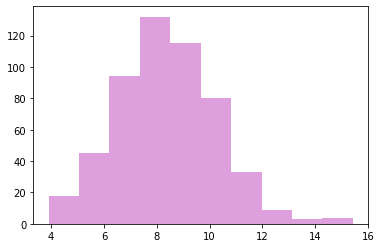

In [36]:
enz = df.loc[df.Category == "0=Blood Donor"]['CHE'].values
plt.hist(enz, color = 'plum')
plt.show()

Гистограмма похожа на нормальное распределение, поэтому будем считать применимой нормальную модель к уровню фермента СНЕ.

Построить доверительный интервал уровня α = 0.05 для дисперсии фермента CHE.

In [40]:
from scipy.stats import norm
from scipy.stats import chi2

# norm.cdf(x) = F(x) - функция распределения в точке x
# norm.ppf(t) = F^{-1}(t) = u_t: то есть (F(u_t) = t)

alpha = 0.05
eps2 = alpha / 2
eps1 = alpha / 2

n = len(enz)
print("Число здоровых людей:", n)

Число здоровых людей: 533


In [41]:
disp_left_border = n * np.mean((enz - np.mean(enz))**2) / chi2.ppf(1 - eps2, df=n - 1)
disp_right_border = n * np.mean((enz - np.mean(enz))**2) / chi2.ppf(eps1, df=n - 1)

print("Левая граница:", disp_left_border, "правая граница:", disp_right_border)

Левая граница: 3.1490613820884863 правая граница: 4.005517120072366


# 13.1.2

Построить доверительный интервал уровня α = 0.05 для среднего уровня фермента CHE. Проделать
эту работу по всей выборке (без ограничения на здоровых пациентов).

In [66]:
from scipy.stats import t

i=len(df["CHE"])

sred_left_border = np.mean(df["CHE"]) - t.ppf(1 - eps2, df= i - 1) * np.sqrt(1 / (i - 1) * np.mean((df["CHE"] - np.mean(df["CHE"]))**2))
sred_right_border = np.mean(df["CHE"]) - t.ppf(eps1, df= i - 1) * np.sqrt(1 / (i - 1) * np.mean((df["CHE"] - np.mean(df["CHE"]))**2))

print("Левая граница:", sred_left_border, "правая граница:", sred_right_border)  


Левая граница: 8.021969305079592 правая граница: 8.371298987603323


# 13.2.1

(Bootstrap) С помощью bootstrap-метода оценить разброс точечных оценок X и S^2 ,построенной по
ненормальной выборке больных людей 
Category != "0=Blood Donor". В чем заключается bootstrap: 
берем случайную подвыборку (с возвращением) из данной нам выборки, размер подвыборки возьмем равным размеру выборки; 
ко вновь полученной подвыборке применяем ту же оценку и сохраняем результат; 
итерируем эту процедуру; 
рисуем гистограмму, сохранненных значений; 
сравнить интервалы с интервалами для здоровых пациентов.

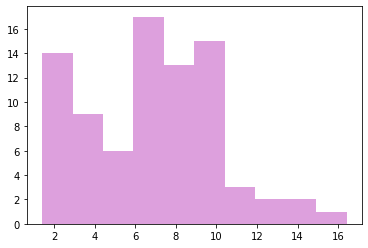

In [52]:
che = df[df.Category != '0=Blood Donor']['CHE'].values
plt.hist(che, color = 'plum')
plt.show()

Данная выборка ненормальная

In [74]:
N = len(che)

mo = []
disp = []

for i in range(1000):
    podv = np.random.choice(che, len(che))
    mo.append(podv.mean()) 
    disp.append((1/(N-1))*sum((podv - mo[-1])**2))

Построим гистограмму для матожидания и сравним интервалы с интервалами для здоровых пациентов (зеленый).

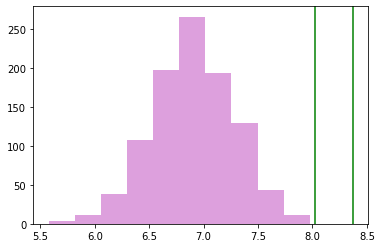

In [76]:
plt.hist(mo, bins = 10, color = 'plum')
plt.axvline(x=sred_left_border, color = 'green')
plt.axvline(x=sred_right_border, color = 'green')

Построим гистограмму для дисперсии и сравним интервалы с интервалами для здоровых пациентов (зеленый).

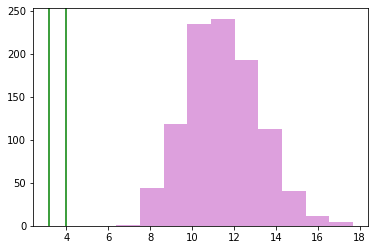

In [78]:
plt.hist(disp, bins = 10, color = 'plum')
plt.axvline(x=disp_left_border, color = 'green')
plt.axvline(x=disp_right_border, color = 'green')

# 13.2.2

X1, . . . , Xn ∼ Exp(θ). Используя статистику X(1), построить доверительный интервал для θ. Подсказка: min(θXi) имеет экспоненциальное распределение, не зависящее от θ.

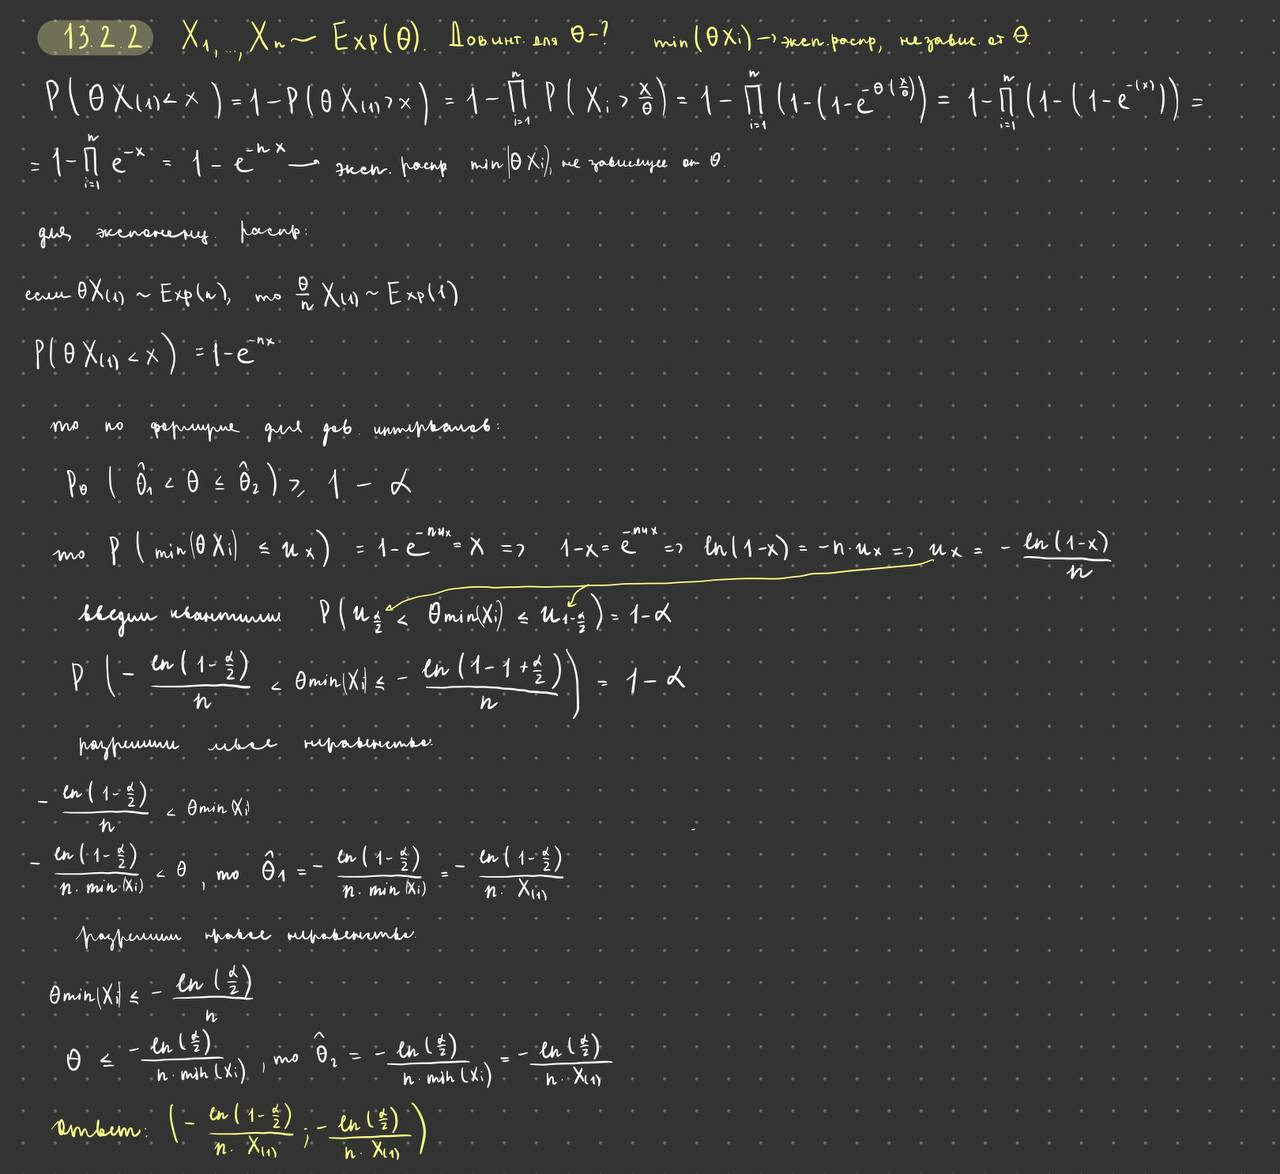

# Ф1

X1, X2, . . . , Xn ∼ Bern(θ). Построить асимптотический доверительный интервал параметра θ уровня
α = 0.05.

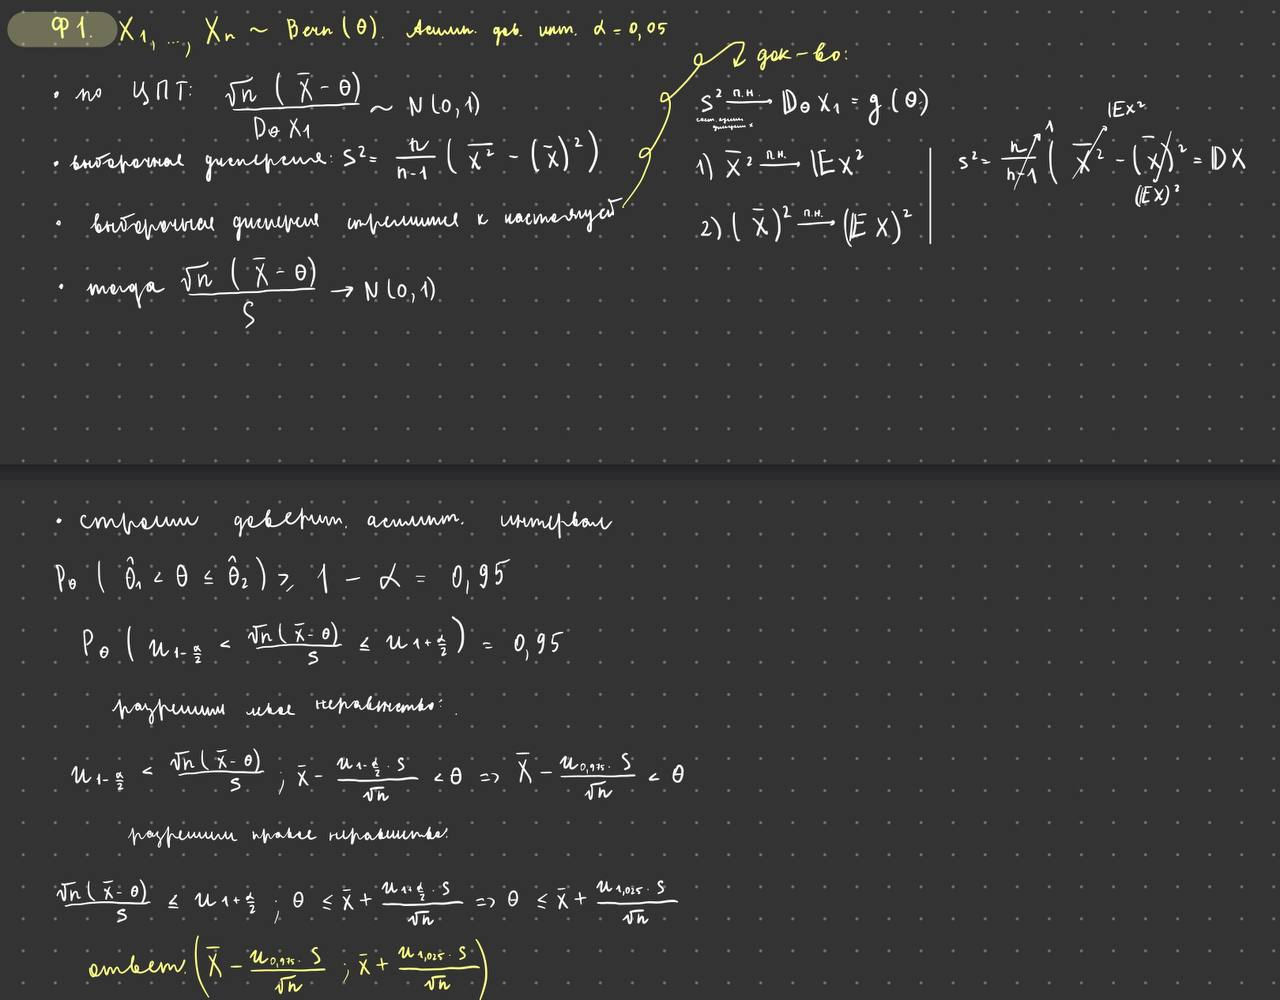